## Alapvető Pandas példák

Ez a jegyzetfüzet bemutat néhány alapvető Pandas fogalmat. Kezdjük a tipikus adatkutatási könyvtárak importálásával:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Sorozat

A sorozat olyan, mint egy lista vagy 1D-tömb, de van indexe. Minden művelet index szerint van igazítva.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


A sorozatok egyik gyakori felhasználási módja az **idősorok**. Az idősorokban az indexnek különleges szerkezete van – általában dátumok vagy időpontok tartománya. Ilyen indexet létrehozhatunk a `pd.date_range` segítségével.

Tegyük fel, hogy van egy sorozatunk, amely megmutatja, hogy naponta hány terméket vásároltak, és tudjuk, hogy minden vasárnap magunknak is el kell vennünk egy terméket. Így modellezhetjük ezt sorozatokkal:


Length of index is 366


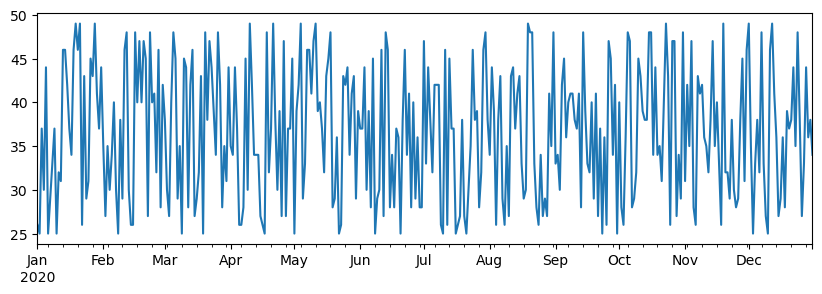

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Amint láthatja, problémáink vannak itt, mert a heti sorozatban a nem említett napokat hiányzónak (`NaN`) tekintjük, és ha egy számhoz hozzáadunk `NaN`-t, az eredmény `NaN` lesz. Ahhoz, hogy helyes eredményt kapjunk, meg kell adnunk a `fill_value` értéket a sorozatok összeadásakor:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


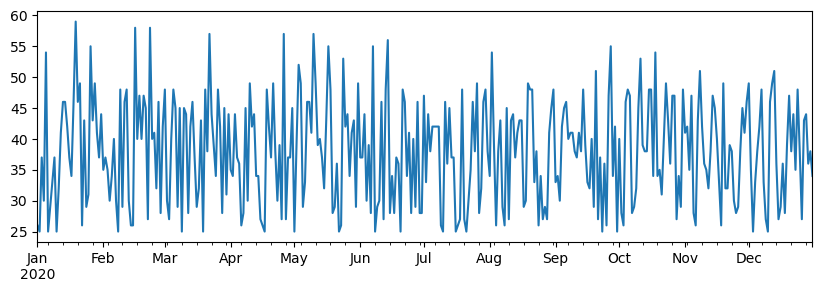

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

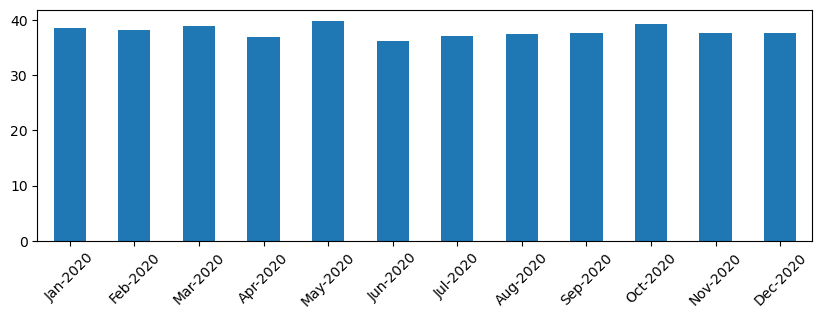

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## Adatkeret

Az adatkeret lényegében egy sorozatok gyűjteménye, amelyeknek ugyanaz az indexük. Több sorozatot össze tudunk kombinálni egy adatkeretbe. Az előzőekben definiált `a` és `b` sorozatok alapján:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Sorozatokat oszlopként is használhatunk, és az oszlopneveket szótár segítségével adhatjuk meg:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Ugyanazt az eredményt el lehet érni transzponálással (majd az oszlopok átnevezésével, hogy megfeleljen az előző példának):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Oszlopok kiválasztása** a DataFrame-ből így történhet:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Sorok kiválasztása** szűrőkifejezés alapján:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Úgy működik, hogy a `df['A']<5` kifejezés egy logikai sorozatot ad vissza, amely jelzi, hogy a kifejezés `True` vagy `False` minden egyes elem esetében a sorozatban. Amikor a sorozatot indexként használjuk, a DataFrame sorainak egy részhalmazát adja vissza. Ezért nem lehetséges tetszőleges Python logikai kifejezést használni, például a `df[df['A']>5 and df['A']<7]` írása helytelen lenne. Ehelyett speciális `&` műveletet kell használni a logikai sorozatokon:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Új számítható oszlopok létrehozása**. Könnyedén létrehozhatunk új számítható oszlopokat a DataFrame-ünkben intuitív kifejezések használatával. Az alábbi kód kiszámítja az A eltérését az átlagos értékétől.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Valójában az történik, hogy egy sorozatot számítunk ki, majd ezt a sorozatot hozzárendeljük a bal oldali oszlophoz, létrehozva egy másik oszlopot.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Sorok kiválasztása számok alapján** az `iloc` konstrukcióval végezhető el. Például, az első 5 sor kiválasztásához a DataFrame-ből:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Csoportosítás** gyakran használatos, hogy az Excel *pivot tábláihoz* hasonló eredményt kapjunk. Tegyük fel, hogy az `A` oszlop átlagértékét szeretnénk kiszámítani minden egyes `LenB` szám esetében. Ekkor csoportosíthatjuk a DataFrame-et `LenB` alapján, és meghívhatjuk a `mean` függvényt:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Ha ki kell számítanunk az átlagot és az elemek számát a csoportban, akkor használhatunk összetettebb `aggregate` függvényt:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Nyomtatás és Ábrázolás

Az adatelemzők gyakran vizsgálják az adatokat, ezért fontos, hogy képesek legyenek vizualizálni azokat. Ha a DataFrame nagy, sokszor csak azt szeretnénk ellenőrizni, hogy mindent helyesen csinálunk, például az első néhány sor kinyomtatásával. Ezt a `df.head()` hívásával lehet megtenni. Ha Jupyter Notebookban futtatod, a DataFrame-t szép táblázatos formában jeleníti meg.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Már láttuk a `plot` függvény használatát néhány oszlop vizualizálására. Bár a `plot` nagyon hasznos sok feladathoz, és számos különböző grafikon típust támogat a `kind=` paraméter segítségével, mindig használhatod a nyers `matplotlib` könyvtárat, ha valami összetettebbet szeretnél ábrázolni. Az adatok vizualizálását részletesen külön tanfolyami leckékben fogjuk tárgyalni.


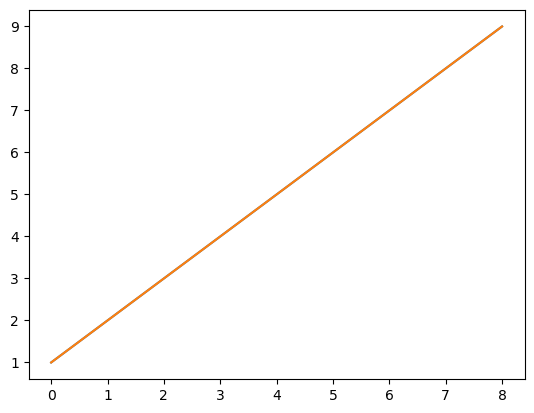

In [61]:
df['A'].plot()
plt.show()

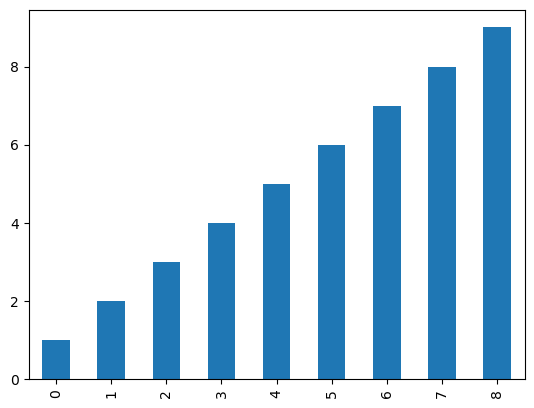

In [63]:
df['A'].plot(kind='bar')
plt.show()

Ez az áttekintés lefedi a Pandas legfontosabb fogalmait, azonban a könyvtár rendkívül gazdag, és nincs határa annak, hogy mit lehet vele megvalósítani! Most alkalmazzuk ezt a tudást egy konkrét probléma megoldására.



---

**Felelősség kizárása**:  
Ez a dokumentum az AI fordítási szolgáltatás, a [Co-op Translator](https://github.com/Azure/co-op-translator) segítségével lett lefordítva. Bár törekszünk a pontosságra, kérjük, vegye figyelembe, hogy az automatikus fordítások hibákat vagy pontatlanságokat tartalmazhatnak. Az eredeti dokumentum az eredeti nyelvén tekintendő hiteles forrásnak. Kritikus információk esetén javasolt professzionális emberi fordítást igénybe venni. Nem vállalunk felelősséget semmilyen félreértésért vagy téves értelmezésért, amely a fordítás használatából eredhet.
